###  Libs

In [ ]:
!pip install networkx==2.8
!pip install matplotlib==3.4.3
import pandas as pd
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import networkx as nx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Load data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data.xlsx to Keyword_data (1).xlsx


In [ ]:
df = pd.read_excel("Keyword_data.xlsx")
df = df[df['Keyword 1'].isna() == False] # remove non-articel rows

### extract keyword data from the above file and convert it to a weighted adjacency matrix

In [ ]:
KEY_WORDS = [i for i in set(df.iloc[:,1:].values.flatten())
             if isinstance(i, str)] # all key words

In [ ]:
d = {}
pairs = list(combinations(KEY_WORDS, 2))
for pair in pairs:
    tmp = df.iloc[:,1:].apply(lambda row: (pair[0] in row.values) &\
                    (pair[1] in row.values), axis = 1).sum()
    d[pair] = tmp # get a pair and weights

In [ ]:
# fill matrix
mat = pd.DataFrame(0, index=KEY_WORDS, columns=KEY_WORDS)
for row in KEY_WORDS:
    for col in KEY_WORDS:
        if row != col:
            if (row, col) in d.keys():
                mat.loc[row, col] = d[(row, col)]
                mat.loc[col, row] = d[(row, col)]

### Read the adjacency matrix and convert it into a weighted network

In [ ]:
import numpy as np
G = nx.from_numpy_matrix(mat.values)

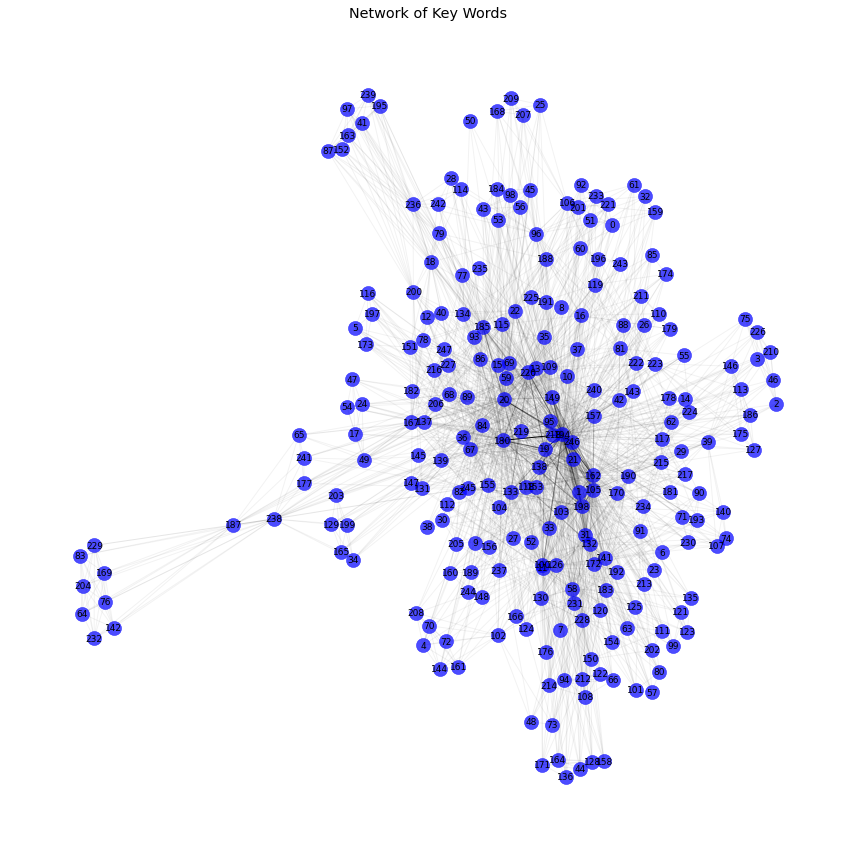

In [ ]:
widths = nx.get_edge_attributes(G, 'weight')

w = np.array(list(widths.values()))
w = (w- np.min(w))/(np.max(w) - np.min(w))
w = [i if i != 0 else 0.05 for i in w]

nodelist = G.nodes()
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       label=True,
                       node_color= "blue",
                       node_size = 200,
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       edge_color='black',
                       alpha= w)

nx.draw_networkx_labels(G,pos, font_size=9)

plt.box(False)
plt.title("Network of Key Words")
plt.tight_layout()
plt.show()

### Compute node degree and strength, Show the top 10 nodes by degree and top 10 nodes by strength

In [ ]:
degree_df = pd.DataFrame(G.degree(), 
             columns=['nodes', 'degree']).\
sort_values("degree",ascending = False).\
reset_index(drop = True)
degree_df['nodes']  = degree_df.nodes.apply(lambda x: KEY_WORDS[x])
print(degree_df.head(10))

                          nodes  degree
0       ORGANIZATIONAL behavior     166
1  ORGANIZATIONAL effectiveness     104
2            MANAGEMENT science     102
3          PERSONNEL management      93
4               DECISION making      90
5      ORGANIZATIONAL structure      74
6      ORGANIZATIONAL sociology      66
7            STRATEGIC planning      66
8         INDUSTRIAL management      64
9          CORPORATE governance      62


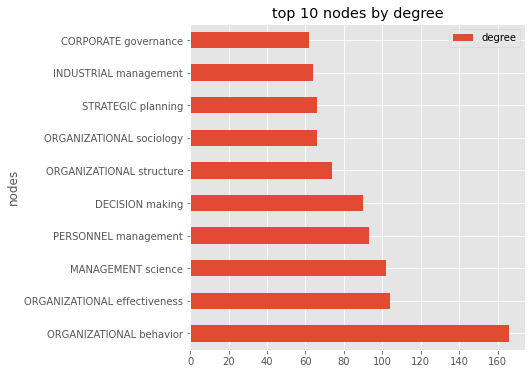

In [ ]:
degree_df.head(10).set_index("nodes").\
plot.barh(figsize = (6, 6))
plt.title("top 10 nodes by degree")
plt.show()

In [ ]:
strength_df = pd.DataFrame(G.degree(weight='weight'), 
             columns=['nodes', 'strength']).\
sort_values("strength",ascending = False).\
reset_index(drop = True)
strength_df['nodes']  = strength_df.nodes.apply(lambda x: KEY_WORDS[x])
print(strength_df.head(10))

                          nodes  strength
0       ORGANIZATIONAL behavior       265
1  ORGANIZATIONAL effectiveness       144
2            MANAGEMENT science       136
3          PERSONNEL management       126
4               DECISION making       112
5      ORGANIZATIONAL structure       107
6      ORGANIZATIONAL sociology        96
7          CORPORATE governance        85
8         INDUSTRIAL management        84
9            STRATEGIC planning        80


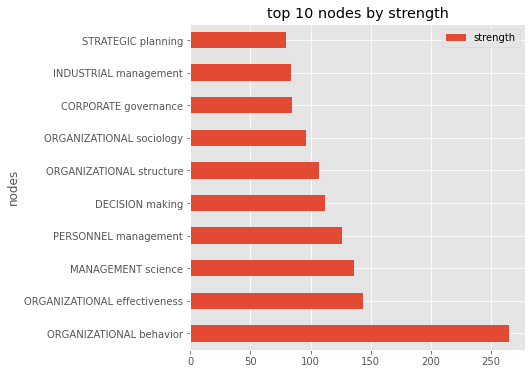

In [ ]:
strength_df.head(10).set_index("nodes").\
plot.barh(figsize = (6, 6))
plt.title("top 10 nodes by strength")
plt.show()

### Show the top 10 node pairs by weight

In [ ]:
n = 0
d = dict(sorted(d.items(), key=lambda item: -item[1]))
for k,v in d.items():
    print(n)
    print(k, v)
    n = n + 1
    if n == 10:
        break


0
('ORGANIZATIONAL effectiveness', 'ORGANIZATIONAL behavior') 11
1
('ORGANIZATIONAL structure', 'ORGANIZATIONAL behavior') 9
2
('PERSONNEL management', 'ORGANIZATIONAL behavior') 8
3
('ORGANIZATIONAL behavior', 'MANAGEMENT science') 7
4
('ORGANIZATIONAL structure', 'ORGANIZATIONAL effectiveness') 6
5
('DECISION making', 'ORGANIZATIONAL behavior') 6
6
('ORGANIZATIONAL behavior', 'ORGANIZATIONAL sociology') 6
7
('ORGANIZATIONAL behavior', 'CORPORATE governance') 6
8
('INDUSTRIAL relations', 'ORGANIZATIONAL behavior') 5
9
('MANAGEMENT', 'ORGANIZATIONAL behavior') 5


### Plot average strength （per articel） on y-axis and degree on x-axis

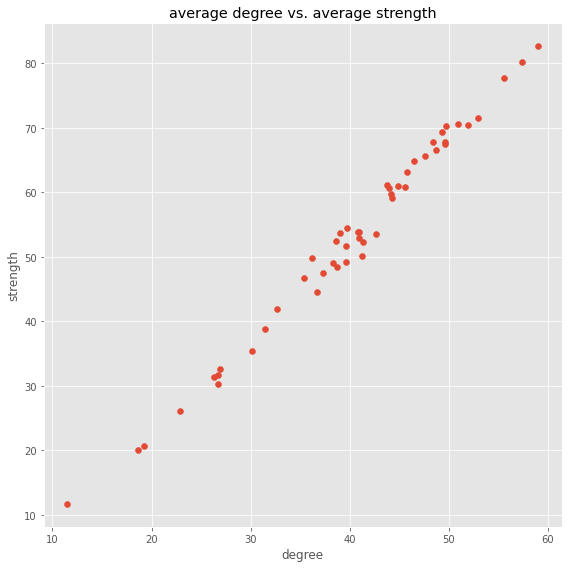

In [ ]:
avg_degree = df.apply(lambda row: 
                      pd.DataFrame((G.degree([KEY_WORDS.index(i) for i in row[1:]  if i in KEY_WORDS])))[1].mean(),
                      axis = 1)

avg_strength = df.apply(lambda row: 
                      pd.DataFrame((G.degree([KEY_WORDS.index(i) for i in row[1:]  if i in KEY_WORDS],
                                             weight='weight')))[1].mean(),
                      axis = 1)
plt.figure(figsize=(8, 8))
plt.scatter(avg_degree, avg_strength)
plt.xlabel("degree")
plt.ylabel("strength")
plt.title("average degree vs. average strength")
plt.tight_layout()
plt.show()

In [ ]:
!jupyter nbconvert --to html Project3Task1,Data1.ipynb 